In [1]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import shap

In [2]:
df = pd.read_csv(r'.\dataset.csv')
df2=df.copy()

In [4]:
df2.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<AxesSubplot: >

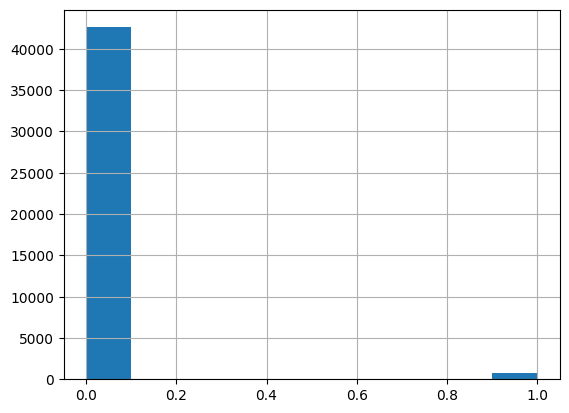

In [241]:
df.stroke.hist()

In [230]:
df3=df2[df2.stroke==1]
df4=df2[df2.stroke==0]
df3=df3.append(df4.sample(n=df2[df.stroke==1].shape[0]))

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [231]:
df3.shape

(1566, 12)

In [232]:
df3=df3.sample(frac=1).reset_index(drop=True)
y = df3[df.columns[-1]]
del df3[df.columns[-1]]
x = df3

<AxesSubplot: >

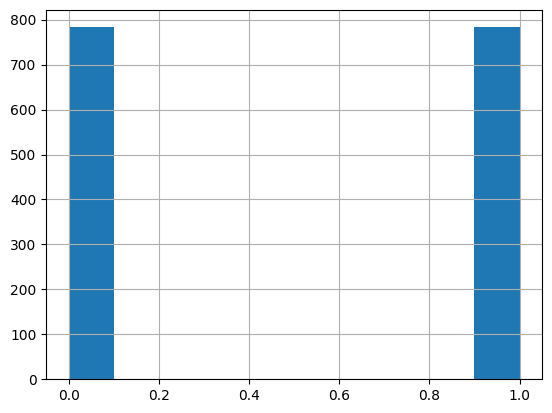

In [242]:
y.hist()

In [233]:
x.replace(x.gender.unique(),[i for i in range( len(x.gender.unique()))],inplace=True)
x.replace(x.ever_married.unique(),[i for i in range( len(x.ever_married.unique()))],inplace=True)
x.replace(x.work_type.unique(),[i for i in range( len(x.work_type.unique()))],inplace=True)
x.replace(x.Residence_type.unique(),[i for i in range( len(x.Residence_type.unique()))],inplace=True)
x.replace(x.smoking_status.unique(),[i for i in range( len(x.smoking_status.unique()))],inplace=True)


In [234]:
x

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,58657,0,39.0,0,0,0,0,0,136.94,30.1,0.0
1,5284,1,77.0,0,1,1,1,0,110.34,32.4,1.0
2,1836,1,51.0,1,0,1,2,0,88.20,28.4,0.0
3,6723,0,61.0,0,0,1,0,0,96.22,3.0,1.0
4,56423,1,75.0,1,0,1,2,0,74.95,23.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1561,43205,1,36.0,0,0,1,1,1,85.06,26.9,2.0
1562,21696,0,71.0,0,0,1,0,0,65.87,29.1,3.0
1563,68627,0,80.0,1,1,1,2,0,175.29,31.5,1.0
1564,18722,0,16.0,0,0,0,4,1,89.31,23.5,3.0


In [235]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [236]:
model= RandomForestRegressor()
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [237]:
pred= model.predict(xtest)
result = np.where(pred<0.5, 0,1)

<AxesSubplot: >

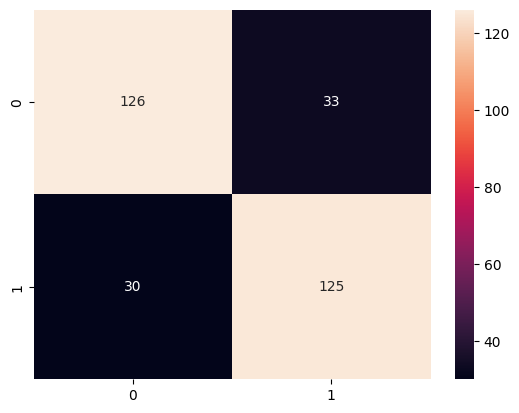

In [238]:
cf = confusion_matrix(result,ytest)
sns.heatmap(cf,annot=True, fmt='g')

In [243]:
print(f'accuracy: { sum(cf.diagonal())/sum(sum(cf)) }')

accuracy: 0.7993630573248408


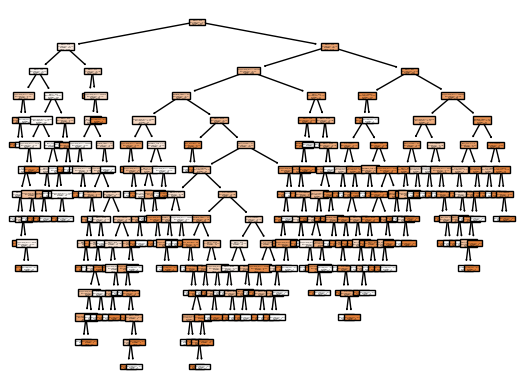

In [240]:
from sklearn.tree import plot_tree
plot_tree(model.estimators_[5], feature_names = x.columns,class_names=['Disease', "No Disease"],filled=True);

In [244]:
from sklearn import svm

In [247]:
model2=svm.SVC(kernel='linear')
model2.fit(xtrain,ytrain)

SVC(kernel='linear')

<AxesSubplot: >

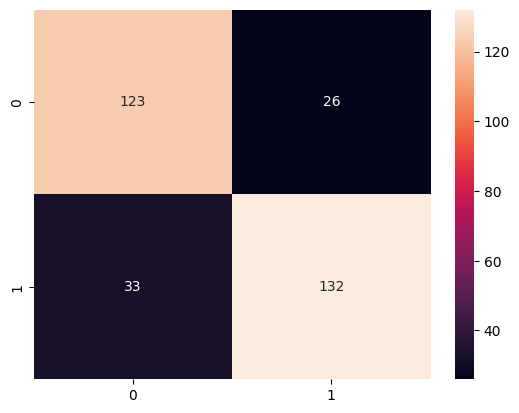

In [258]:
pred= model2.predict(xtest)
result = np.where(pred<0.5, 0,1)
cf = confusion_matrix(result,ytest)
sns.heatmap(cf,annot=True, fmt='g')

In [259]:
print(f'accuracy: { sum(cf.diagonal())/sum(sum(cf)) }')

accuracy: 0.8121019108280255


Permutation explainer: 315it [01:30,  3.12it/s]                         
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


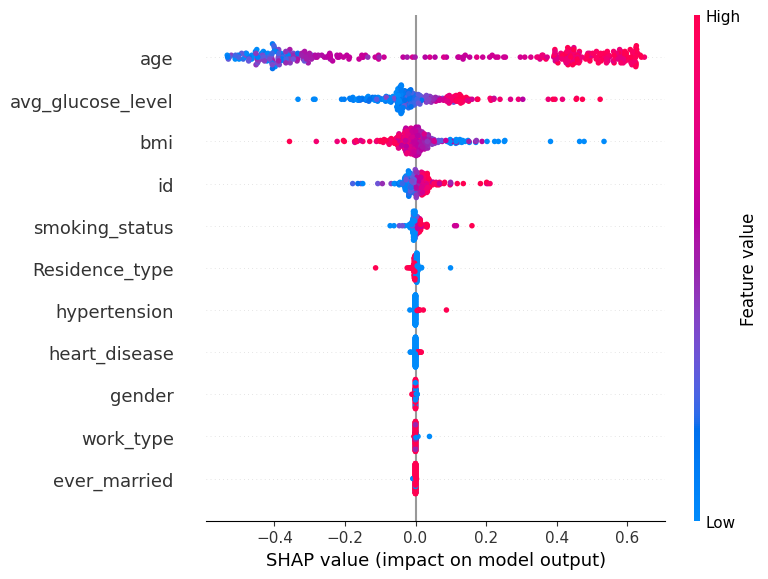

In [260]:
explainer=shap.Explainer(model2.predict, xtest)
shap_values=explainer(xtest)
shap.summary_plot(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


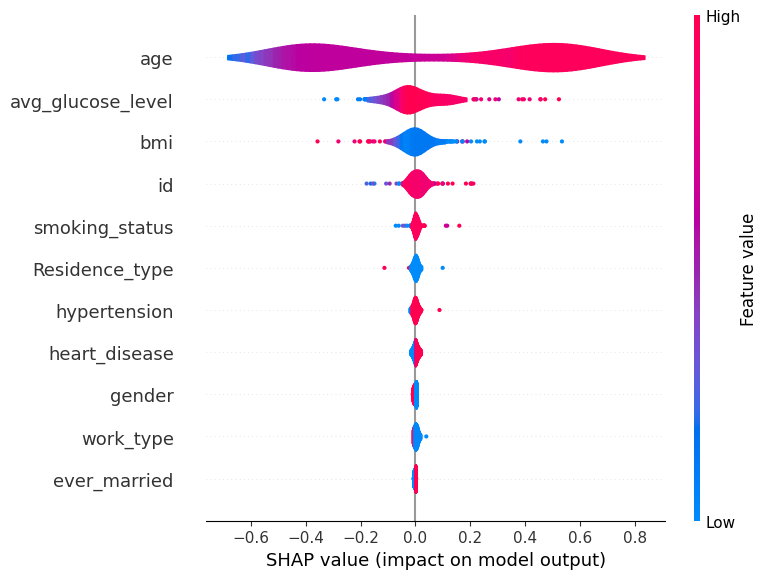

In [261]:
shap.summary_plot(shap_values,plot_type='violin')

In [251]:
model3=svm.SVC(kernel='poly')
model3.fit(xtrain,ytrain)

SVC(kernel='poly')

<AxesSubplot: >

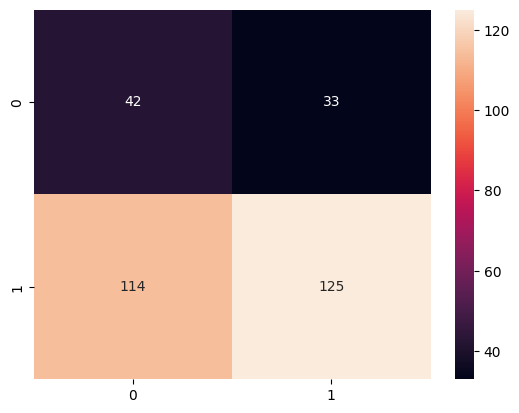

In [252]:
pred= model3.predict(xtest)
result = np.where(pred<0.5, 0,1)
cf = confusion_matrix(result,ytest)
sns.heatmap(cf,annot=True, fmt='g')

In [254]:
model4=svm.SVC(kernel='rbf')
model4.fit(xtrain,ytrain)

SVC()

<AxesSubplot: >

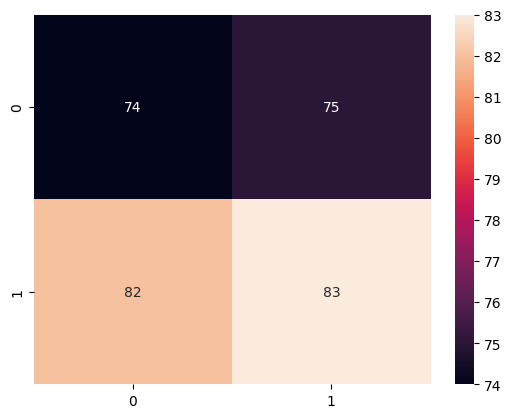

In [255]:
pred= model3.predict(xtest)
result = np.where(pred<0.5, 0,1)
cf = confusion_matrix(result,ytest)
sns.heatmap(cf,annot=True, fmt='g')

In [256]:
model4=svm.SVC(kernel='sigmoid')
model4.fit(xtrain,ytrain)

SVC(kernel='sigmoid')

<AxesSubplot: >

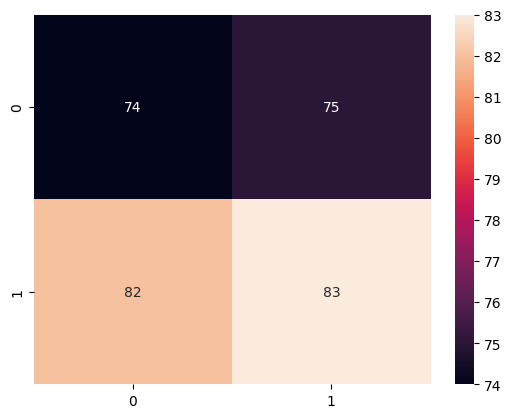

In [257]:
pred= model3.predict(xtest)
result = np.where(pred<0.5, 0,1)
cf = confusion_matrix(result,ytest)
sns.heatmap(cf,annot=True, fmt='g')